In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
x_train, x_test = x_train / 255.0, x_test /255.0
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7)
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

Train for 2100 steps, validate for 900 steps
Epoch 1/10
2100/2100 [==============================] - 2s 1ms/step - loss: 0.7993 - accuracy: 0.7671 - val_loss: 0.3762 - val_accuracy: 0.8908
Epoch 2/10
2100/2100 [==============================] - 2s 1ms/step - loss: 0.3486 - accuracy: 0.8997 - val_loss: 0.3030 - val_accuracy: 0.9142
Epoch 3/10
2100/2100 [==============================] - 2s 1ms/step - loss: 0.2937 - accuracy: 0.9152 - val_loss: 0.2685 - val_accuracy: 0.9246
Epoch 4/10
2100/2100 [==============================] - 2s 1ms/step - loss: 0.2651 - accuracy: 0.9236 - val_loss: 0.2359 - val_accuracy: 0.9330
Epoch 5/10
2100/2100 [==============================] - 2s 1ms/step - loss: 0.2354 - accuracy: 0.9335 - val_loss: 0.2381 - val_accuracy: 0.9303
Epoch 6/10
2100/2100 [==============================] - 2s 998us/step - loss: 0.2183 - accuracy: 0.9371 - val_loss: 0.2022 - val_accuracy: 0.9433
Epoch 7/10
2100/2100 [==============================] - 2s 1ms/step - loss: 0.2059 - accu

In [14]:
print('모델 평가')
model.evaluate(x_test, y_test)
model.summary()
model.save('mnist_model.h5')

모델 평가
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1809 - accuracy: 0.9456
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


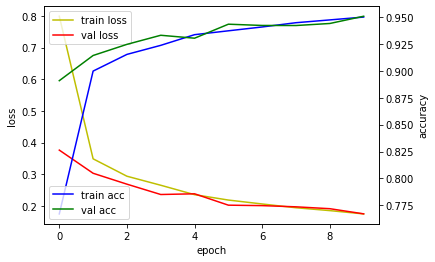

In [15]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()